In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sndata.csp import DR3
from sndata.sdss import Sako18Spec

In [2]:
#overlapping histograms
#seperate plots for pew and vel

In [3]:
sdss_combined = pd.read_csv('~/Desktop/Research/SN-Spectral-Evolution/results/sdss_combined.csv')
sdss_combined

,feat_name,obj_id,time,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,...,agePEGASE,ageloPEGASE,agehiPEGASE,minchi2PEGASE,Notes,delta_t,is_peak,branch_type,arcmin,kpc
0,pW6,19128,2454387.5,5630.787447,5932.631261,8144.168668,0.0,341.659397,16.352920,0.0,...,NaN,NaN,NaN,NaN,NaN,0.1,True,BL,NaN,NaN
1,pW2,2017,2453636.5,3908.025238,4040.182181,NaN,0.0,NaN,17.092118,0.0,...,1.25,1.08,1.39,0.14,NaN,0.1,True,SS,0.034500,43.077351
2,pW1,2017,2453636.5,3615.136877,3908.025238,13865.174056,0.0,323.138916,52.658139,0.0,...,1.25,1.08,1.39,0.14,NaN,0.1,True,SS,0.034500,43.077351
3,pW2,19128,2454387.5,3942.640340,4073.335600,8793.661154,0.0,735.823388,8.520702,0.0,...,NaN,NaN,NaN,NaN,NaN,0.1,True,BL,NaN,NaN
4,pW1,2689,2453637.5,3657.035407,3918.106397,11820.961436,0.0,443.806031,103.331980,0.0,...,5.58,4.75,9.70,6.98,NaN,0.1,True,NaN,0.049833,62.012352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,pW7,2165,2453641.5,5919.931260,6572.577243,9137.197106,0.0,241.346074,209.514632,0.0,...,0.86,0.03,4.07,8.78,NaN,6.7,True,CL,0.012000,15.057214
797,pW1,19968,2454406.5,3507.901777,3921.776287,17654.228010,0.0,76.274254,158.092375,0.0,...,2.41,2.41,2.72,61.46,NaN,6.8,True,SS,0.027500,34.389803
798,pW3,8719,2453683.5,4084.014864,4480.981091,14043.481108,0.0,229.733128,70.137655,0.0,...,0.20,0.08,0.64,5.96,NaN,7.0,True,NaN,0.029333,36.667727
799,pW1,8719,2453683.5,3552.557347,3932.169859,16685.149802,0.0,230.510419,134.423657,0.0,...,0.20,0.08,0.64,5.96,NaN,7.0,True,NaN,0.029333,36.667727


In [4]:
zCMB = sdss_combined['zCMB'].dropna()
zHelio = sdss_combined['zspecHelio'].dropna()
logMass = sdss_combined['logMassFSPS'].dropna()
logSSFR = sdss_combined['logSSFRFSPS'].dropna()

med_zCMB = np.median(zCMB)
med_zHelio = np.median(zHelio)

med_logMass = 10
med_logSSFR = np.median(logSSFR)

high_zCMB = sdss_combined[sdss_combined['zCMB'] > med_zCMB]
low_zCMB = sdss_combined[sdss_combined['zCMB'] <= med_zCMB]
high_zHelio = sdss_combined[sdss_combined['zspecHelio'] > med_zHelio]
low_zHelio = sdss_combined[sdss_combined['zspecHelio'] <= med_zHelio]
high_logMass = sdss_combined[sdss_combined['logMassFSPS'] > med_logMass]
low_logMass = sdss_combined[sdss_combined['logMassFSPS'] <= med_logMass]
high_logSSFR = sdss_combined[sdss_combined['logSSFRFSPS'] > med_logSSFR]
low_logSSFR = sdss_combined[sdss_combined['logSSFRFSPS'] <= med_logSSFR]



In [5]:
print(med_zCMB)

0.174279


In [6]:
def feat_hist(df):
    hist_list = []
    for i in range(1,9):
        new_hist = df[df['feat_name'] == f'pW{i}']
        hist_list.append(new_hist)
    return hist_list

In [7]:
high_zCMB_feat_hists = feat_hist(high_zCMB)
low_zCMB_feat_hists = feat_hist(low_zCMB)
high_zHelio_feat_hists = feat_hist(high_zHelio)
low_zHelio_feat_hists = feat_hist(low_zHelio)
high_logMass_feat_hists = feat_hist(high_logMass)
low_logMass_feat_hists = feat_hist(low_logMass)
high_logSSFR_feat_hists = feat_hist(high_logSSFR)
low_logSSFR_feat_hists = feat_hist(low_logSSFR)

In [47]:
def make_hist(high_data, low_data, p_or_v, title):
    '''high_data: (df) one of feat_hists df
    low_data:  (df) one of feat_hists df
    p_or_v:    (string) 'pew' or 'vel'
    title:     (string) title of histograms'''
    
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15,20))
    fig.suptitle(title, size = 20)

    ax1.hist(high_data[1][p_or_v], label = 'high')
    ax1.hist(low_data[1][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax1.set_xlabel(p_or_v)
    ax1.set_ylabel('counts')
    ax1.set_title('Ca ii H&K', loc = 'left')
    ax1.legend()
    
    ax2.hist(high_data[2][p_or_v], label = 'high')
    ax2.hist(low_data[2][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax2.set_xlabel(p_or_v)
    ax2.set_ylabel('counts')
    ax2.set_title('Si ii λ4130', loc = 'left')
    ax2.legend()
    
    ax3.hist(high_data[3][p_or_v], label = 'high')
    ax3.hist(low_data[3][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax3.set_xlabel(p_or_v)
    ax3.set_ylabel('counts')
    ax3.set_title('Mg ii, Fe ii', loc = 'left')
    ax3.legend()
    
    ax4.hist(high_data[4][p_or_v], label = 'high')
    ax4.hist(low_data[4][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax4.set_xlabel(p_or_v)
    ax4.set_ylabel('counts')
    ax4.set_title('Fe ii, Si ii', loc = 'left')
    ax4.legend()

    ax5.hist(high_data[5][p_or_v], label = 'high')
    ax5.hist(low_data[5][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax5.set_xlabel(p_or_v)
    ax5.set_ylabel('counts')
    ax5.set_title('S ii λ5449, λ5622', loc = 'left')
    ax5.legend()

    ax6.hist(high_data[6][p_or_v], label = 'high')
    ax6.hist(low_data[6][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax6.set_xlabel(p_or_v)
    ax6.set_ylabel('counts')
    ax6.set_title('Si ii λ5972', loc = 'left')
    ax6.legend()

    ax7.hist(high_data[7][p_or_v], label = 'high')
    ax7.hist(low_data[7][p_or_v], histtype='step', hatch='//', linewidth=2, label = 'low')
    ax7.set_xlabel(p_or_v)
    ax7.set_ylabel('counts')
    ax7.set_title('Si ii λ6355', loc = 'left')
    ax7.legend()
    
    ax8.hist([])
    ax8.hist([], histtype='step', hatch='//', linewidth=2)

    plt.show()

# low z high z

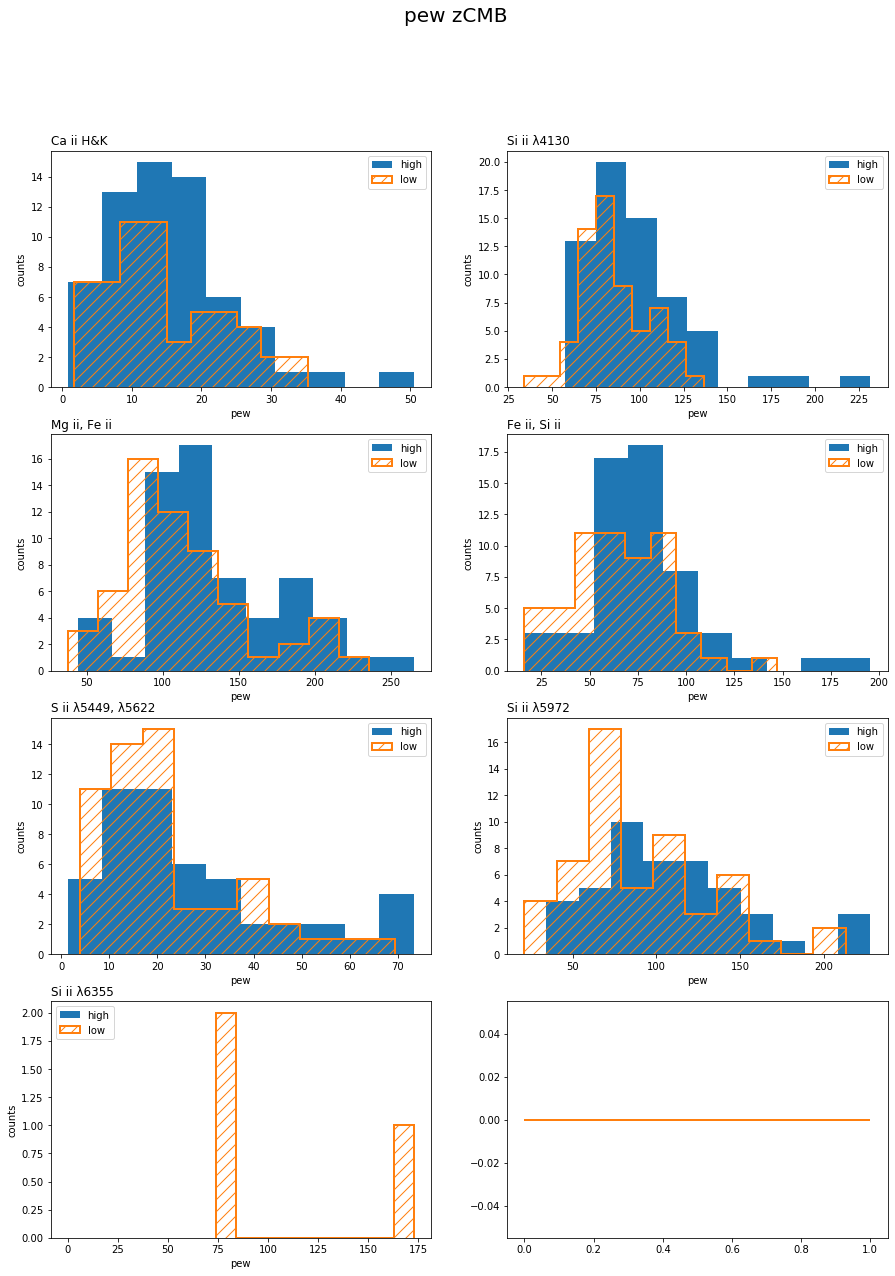

In [48]:
make_hist(high_zCMB_feat_hists, low_zCMB_feat_hists, 'pew', 'pew zCMB')

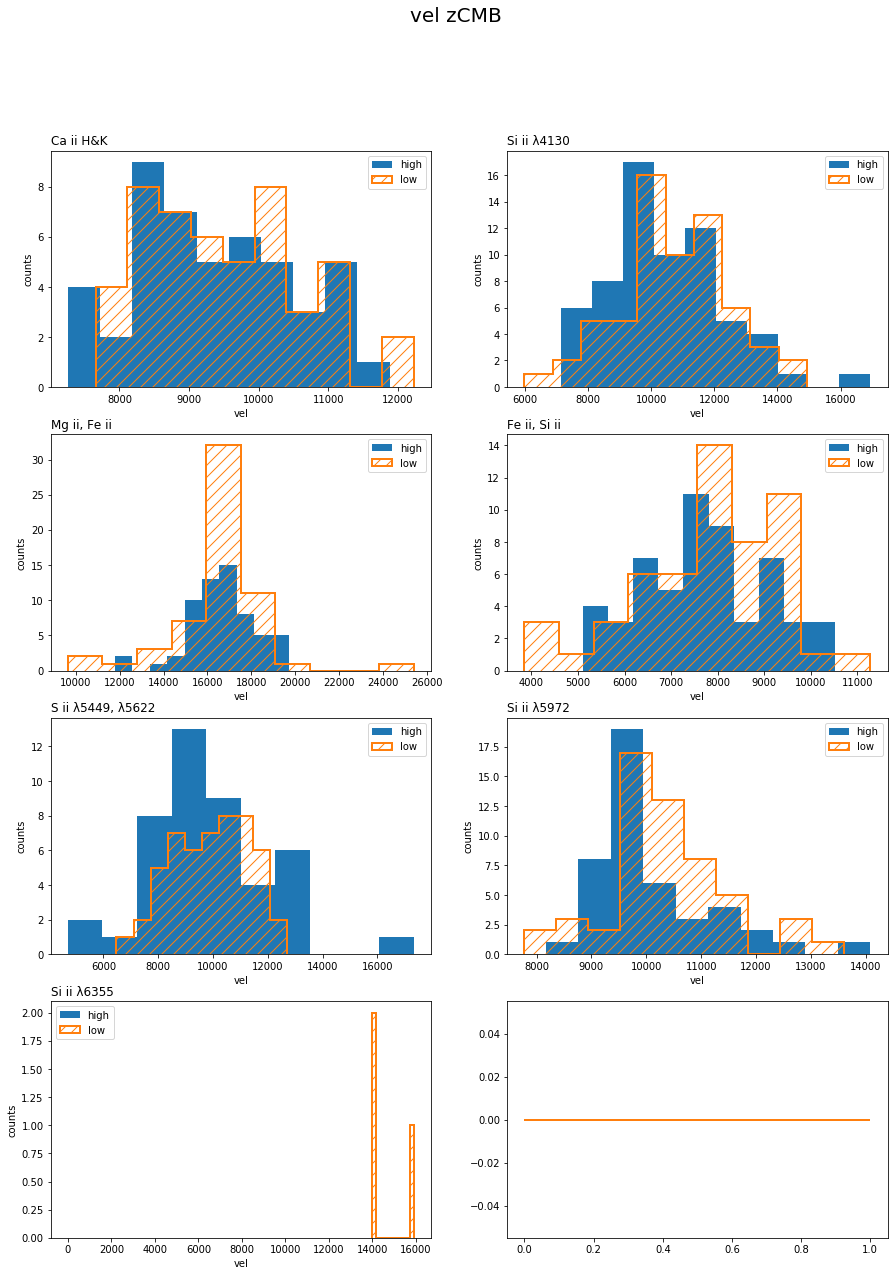

In [49]:
make_hist(high_zCMB_feat_hists, low_zCMB_feat_hists, 'vel', 'vel zCMB')

In [50]:
#make_hist(high_zHelio_feat_hists, low_zHelio_feat_hists, 'pew', 'pew zHelio')

In [51]:
#make_hist(high_zHelio_feat_hists, low_zHelio_feat_hists, 'vel', 'vel zHelio')

# low mass high mass

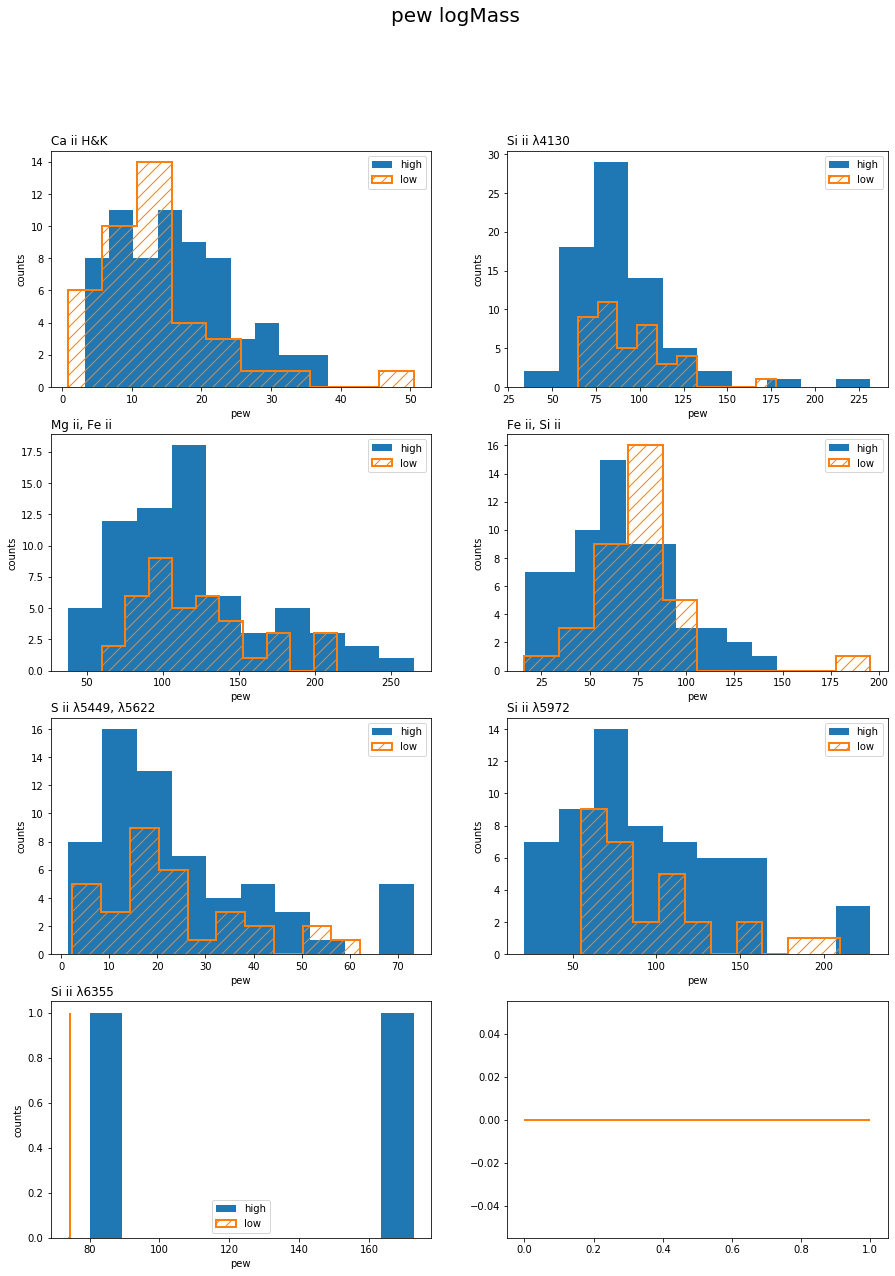

In [52]:
make_hist(high_logMass_feat_hists, low_logMass_feat_hists, 'pew', 'pew logMass')

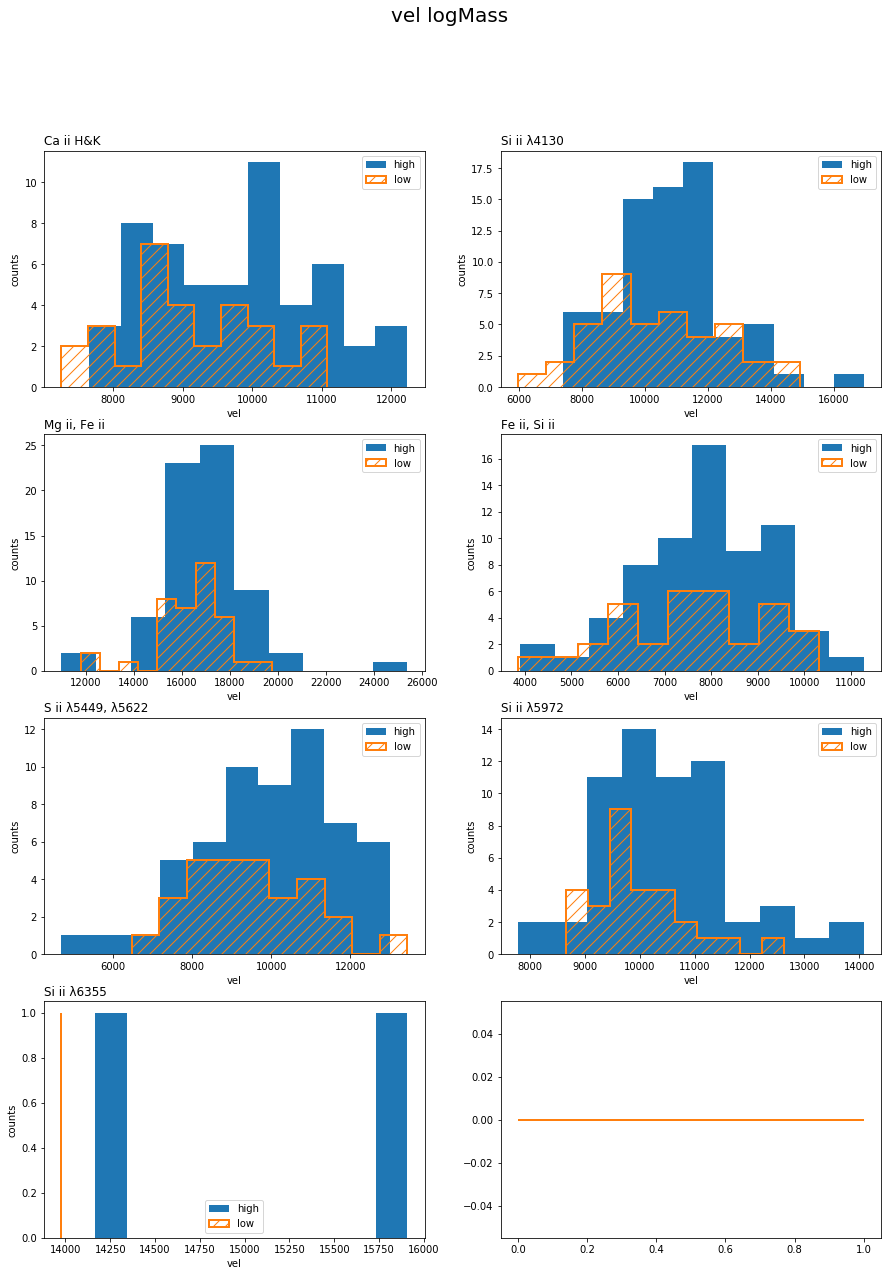

In [53]:
make_hist(high_logMass_feat_hists, low_logMass_feat_hists, 'vel', 'vel logMass')

# low SFR high SFR

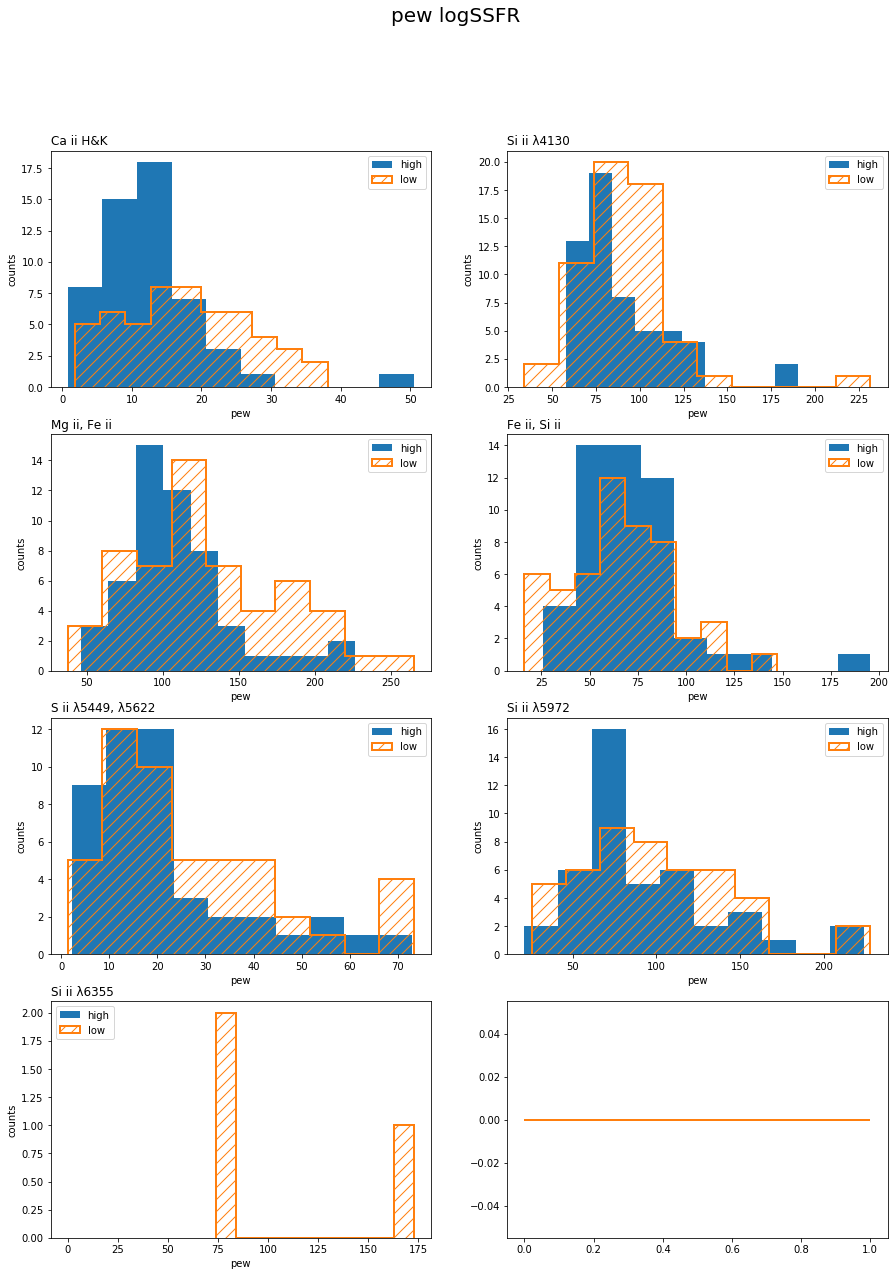

In [54]:
make_hist(high_logSSFR_feat_hists, low_logSSFR_feat_hists, 'pew', 'pew logSSFR')

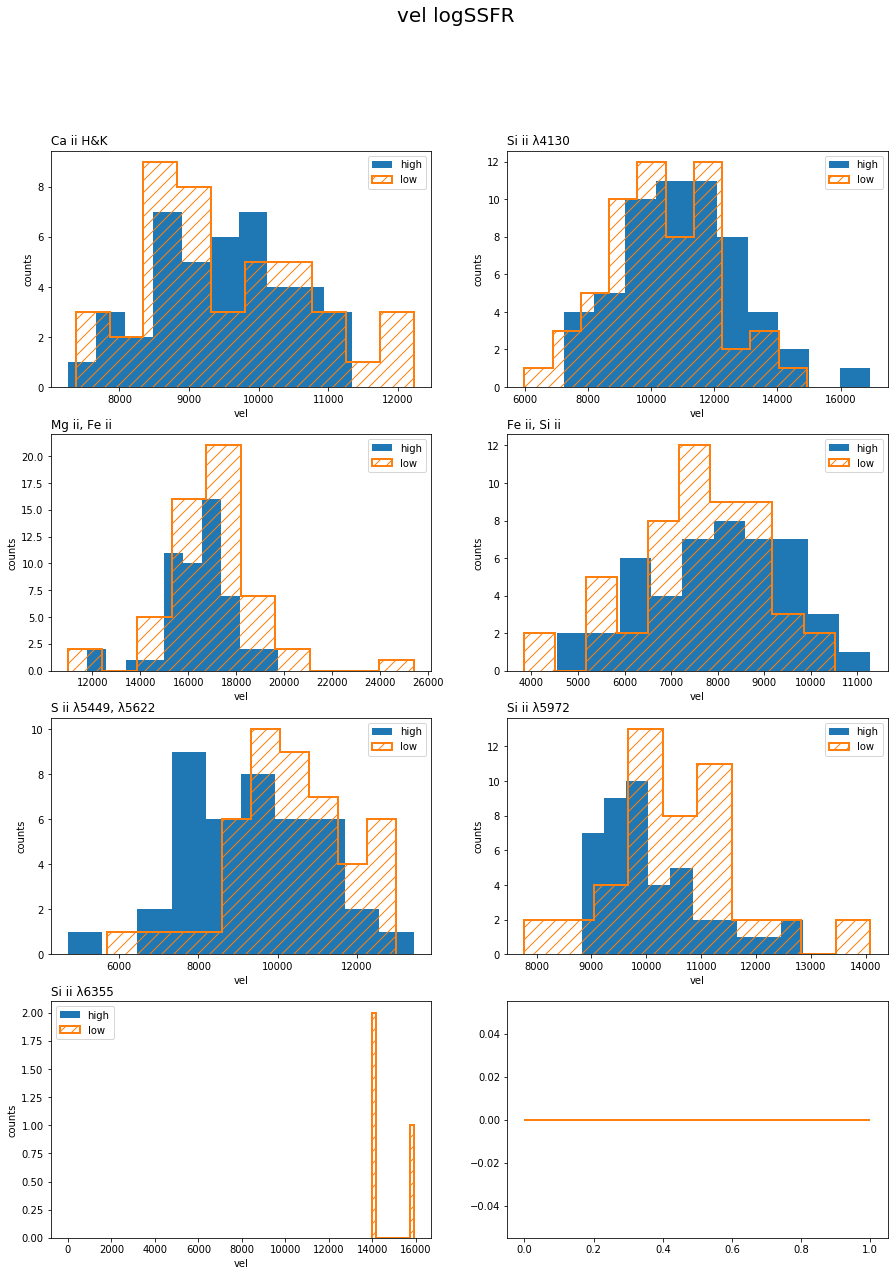

In [55]:
make_hist(high_logSSFR_feat_hists, low_logSSFR_feat_hists, 'vel', 'vel logSSFR')